<a href="https://colab.research.google.com/github/NewTAs/ODCuC/blob/main/ODCuC_220107_Try3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf

from google.colab import drive
drive.mount('Lee_dataset')

Mounted at Lee_dataset


In [2]:
numberOfClass = 2
pictureWeightHeightSize = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_Datasets/11/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),
        batch_size=numberOfClass,
        class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_Datasets/12/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')

Found 360 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications import InceptionResNetV2

model = InceptionResNetV2(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=2)

In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

In [5]:
model.fit(train_generator, epochs=100, validation_data=test_generator)

Epoch 1/100
180/180 [==============================] - 196s 904ms/step - loss: 0.6821 - accuracy: 0.7444 - val_loss: 2.7369 - val_accuracy: 0.5000
Epoch 2/100
180/180 [==============================] - 51s 283ms/step - loss: 0.7117 - accuracy: 0.6750 - val_loss: 0.3234 - val_accuracy: 0.8417
Epoch 3/100
180/180 [==============================] - 51s 283ms/step - loss: 0.3473 - accuracy: 0.8528 - val_loss: 0.3592 - val_accuracy: 0.8667
Epoch 4/100
180/180 [==============================] - 51s 281ms/step - loss: 0.3392 - accuracy: 0.8528 - val_loss: 32.5772 - val_accuracy: 0.2500
Epoch 5/100
180/180 [==============================] - 51s 282ms/step - loss: 0.3676 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7750
Epoch 6/100
180/180 [==============================] - 51s 283ms/step - loss: 0.1793 - accuracy: 0.9278 - val_loss: 4.8304 - val_accuracy: 0.5000
Epoch 7/100
180/180 [==============================] - 51s 283ms/step - loss: 0.0823 - accuracy: 0.9667 - val_loss: 0.2893

In [6]:
print("-- Evaluate --")
scores = model.evaluate(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
60/60 [==============================] - 5s 83ms/step - loss: 0.0332 - accuracy: 0.9750
accuracy: 97.50%


In [7]:
import matplotlib.pyplot as plt

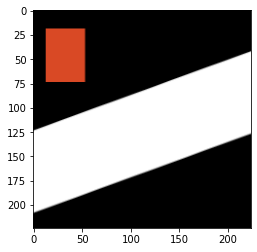

In [10]:
img_path = '/content/Lee_dataset/MyDrive/Lee_final/001/0/001.png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [11]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/001/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/001.png']
{'0': 0}
[[0.999 0.001]]


In [12]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/002/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/002.png']
{'0': 0}
[[0.997 0.003]]


In [13]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/003/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/003.png']
{'0': 0}
[[1.000 0.000]]


In [14]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/004/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/004.png']
{'0': 0}
[[1.000 0.000]]


In [15]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/005/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/005.png']
{'0': 0}
[[0.000 1.000]]


In [16]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/006/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/006.png']
{'0': 0}
[[0.000 1.000]]


In [17]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/007/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/007.png']
{'0': 0}
[[0.000 1.000]]


In [18]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/008/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/008.png']
{'0': 0}
[[0.000 1.000]]


In [19]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/009/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/009.png']
{'0': 0}
[[0.998 0.002]]


In [20]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/010/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/010.png']
{'0': 0}
[[1.000 0.000]]


In [21]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/011/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/011.png']
{'0': 0}
[[0.996 0.004]]


In [22]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/012/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/012.png']
{'0': 0}
[[1.000 0.000]]


In [23]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/013/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['013/013.png']
{'013': 0}
[[0.999 0.001]]


In [24]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/014/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/014.png']
{'0': 0}
[[0.001 0.999]]


In [25]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/015/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/015.png']
{'0': 0}
[[0.998 0.002]]


In [26]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_final/016/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')
print("-- Predict --")
output = model.predict(val_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(val_generator.filenames)
print(val_generator.class_indices)
print(output)

Found 1 images belonging to 1 classes.
-- Predict --
['0/016.png']
{'0': 0}
[[1.000 0.000]]
